In [ ]:
run_project = input("Czy chcesz uruchomić projekt? (tak/nie): ").lower()

if run_project != 'tak':
    raise SystemExit("Projekt nie zostanie uruchomiony.")
print("Projekt uruchomiony.")

## Biblioteki

In [ ]:
!pip install feature_engine
from pathlib import Path
import os
import re
from collections import OrderedDict
from feature_engine.outliers import Winsorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import loguniform, uniform
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    KBinsDiscretizer,
    OneHotEncoder,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    RandomizedSearchCV,
    cross_validate,
)
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    matthews_corrcoef,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    classification_report,
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from IPython.display import display
import joblib
import kagglehub
import pathlib
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

## EDA

100%|██████████| 11.2k/11.2k [00:00<00:00, 17.0MB/s]

Extracting files...
Załadowano 390 wierszy i 20 kolumn.



,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,diabetes
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0,0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0,0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0,0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0,1


<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 401
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        390 non-null    int64  
 1   chol      389 non-null    float64
 2   stab.glu  390 non-null    int64  
 3   hdl       389 non-null    float64
 4   ratio     389 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  390 non-null    object 
 7   age       390 non-null    int64  
 8   gender    390 non-null    object 
 9   height    385 non-null    float64
 10  weight    389 non-null    float64
 11  frame     379 non-null    object 
 12  bp.1s     385 non-null    float64
 13  bp.1d     385 non-null    float64
 14  bp.2s     138 non-null    float64
 15  bp.2d     138 non-null    float64
 16  waist     388 non-null    float64
 17  hip       388 non-null    float64
 18  time.ppn  387 non-null    float64
 19  diabetes  390 non-null    int64  
dtypes: float64(13), int64(4), object(3)
m

,count,mean,std,min,25%,50%,75%,max
id,390.0,16003.761538,11828.808130,1000.00,4792.25,15769.50,20334.25,41752.000000
chol,389.0,207.275064,44.714950,78.00,179.00,203.00,229.00,443.000000
stab.glu,390.0,107.338462,53.798188,48.00,81.00,90.00,107.75,385.000000
hdl,389.0,50.267352,17.301317,12.00,38.00,46.00,59.00,120.000000
ratio,389.0,4.526478,1.738480,1.50,3.20,4.20,5.40,19.299999
glyhb,390.0,5.589769,2.242595,2.68,4.38,4.84,5.60,16.110001
age,390.0,46.774359,16.435911,19.00,34.00,44.50,60.00,92.000000
height,385.0,65.984416,3.925712,52.00,63.00,66.00,69.00,76.000000
weight,389.0,177.349614,40.443560,99.00,150.00,173.00,200.00,325.000000
bp.1s,385.0,137.148052,22.997427,90.00,121.00,136.00,148.00,250.000000



Rozkład klas:


,count
diabetes,
Brak cukrzycy,325
Cukrzyca,65


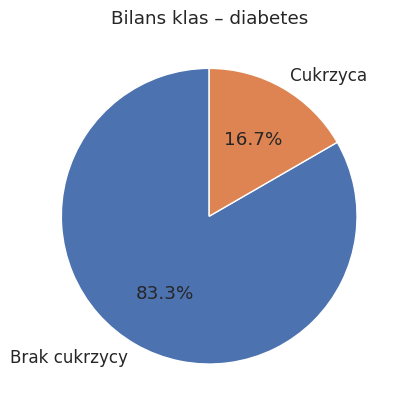


Braki danych w kolumnach:


,Liczba braków
id,0
chol,1
stab.glu,0
hdl,1
ratio,1
glyhb,0
location,0
age,0
gender,0
height,5


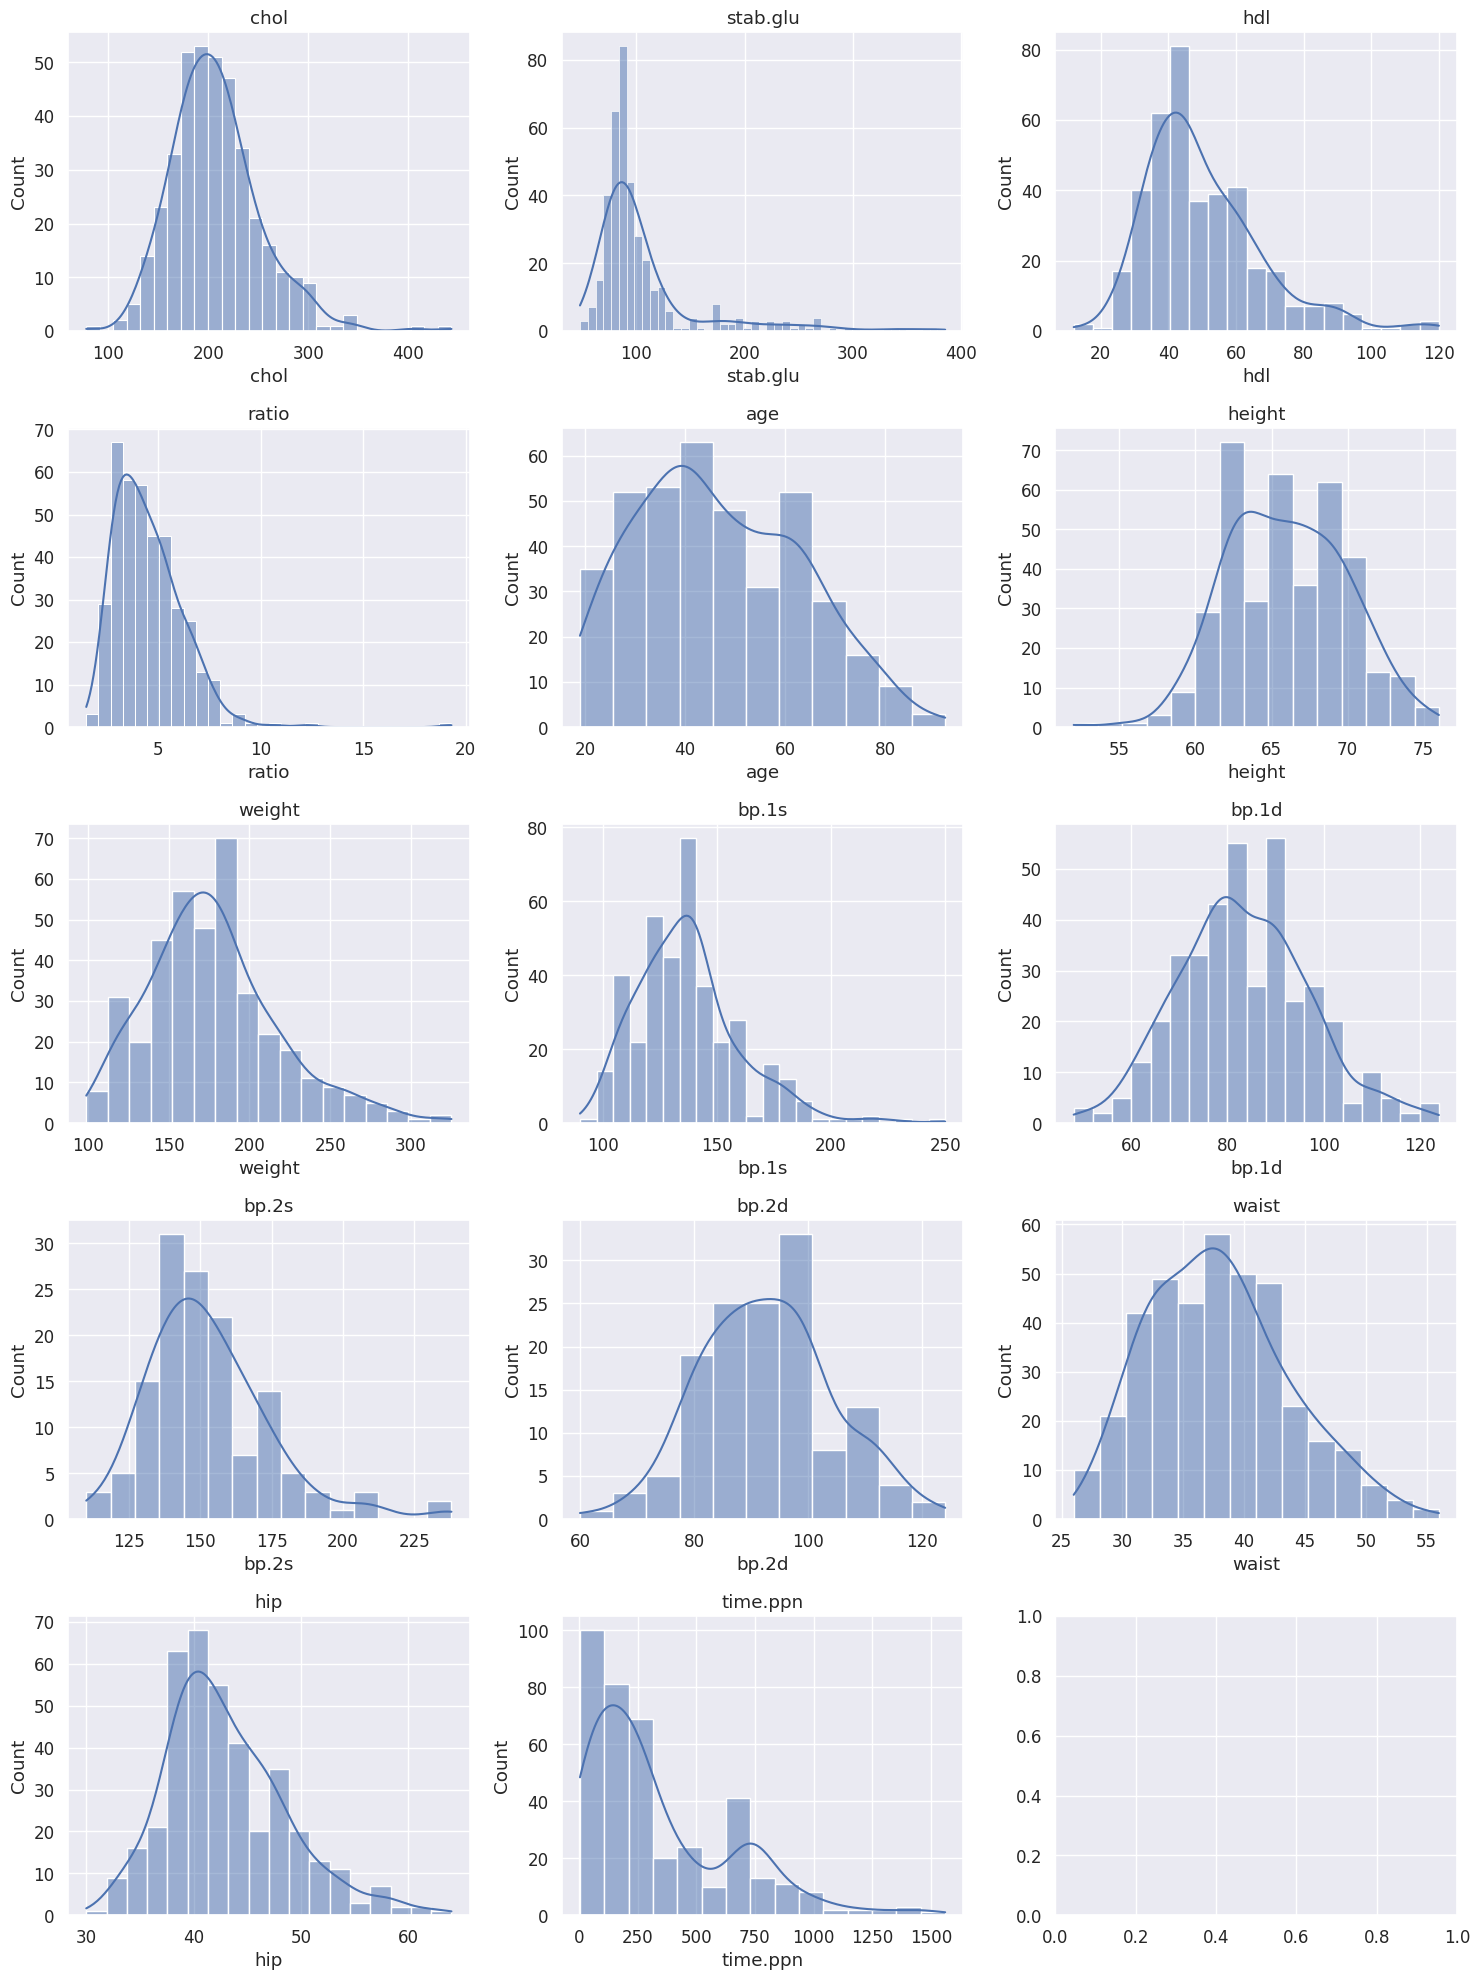

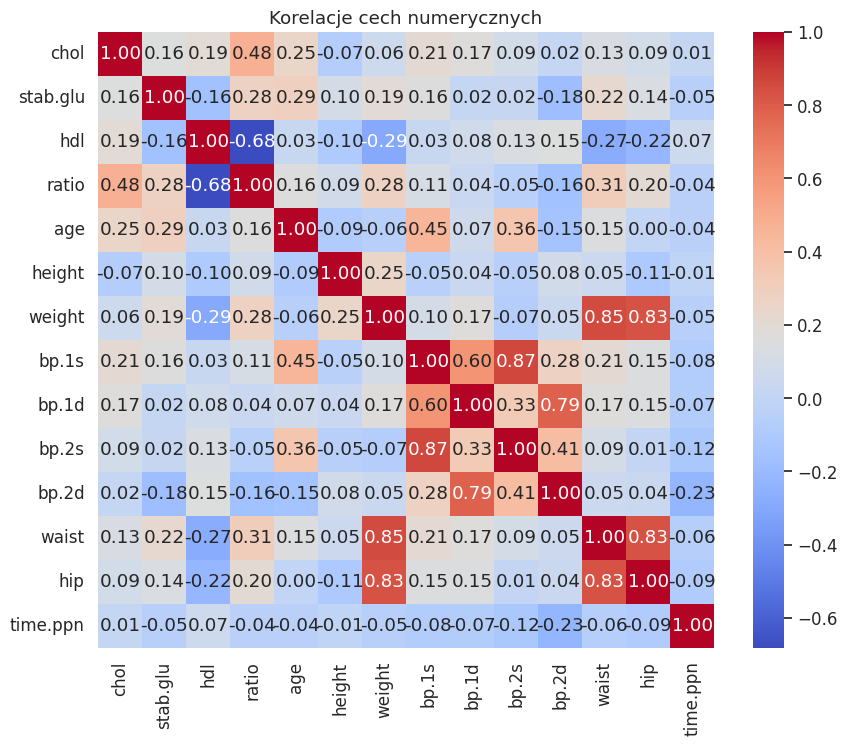

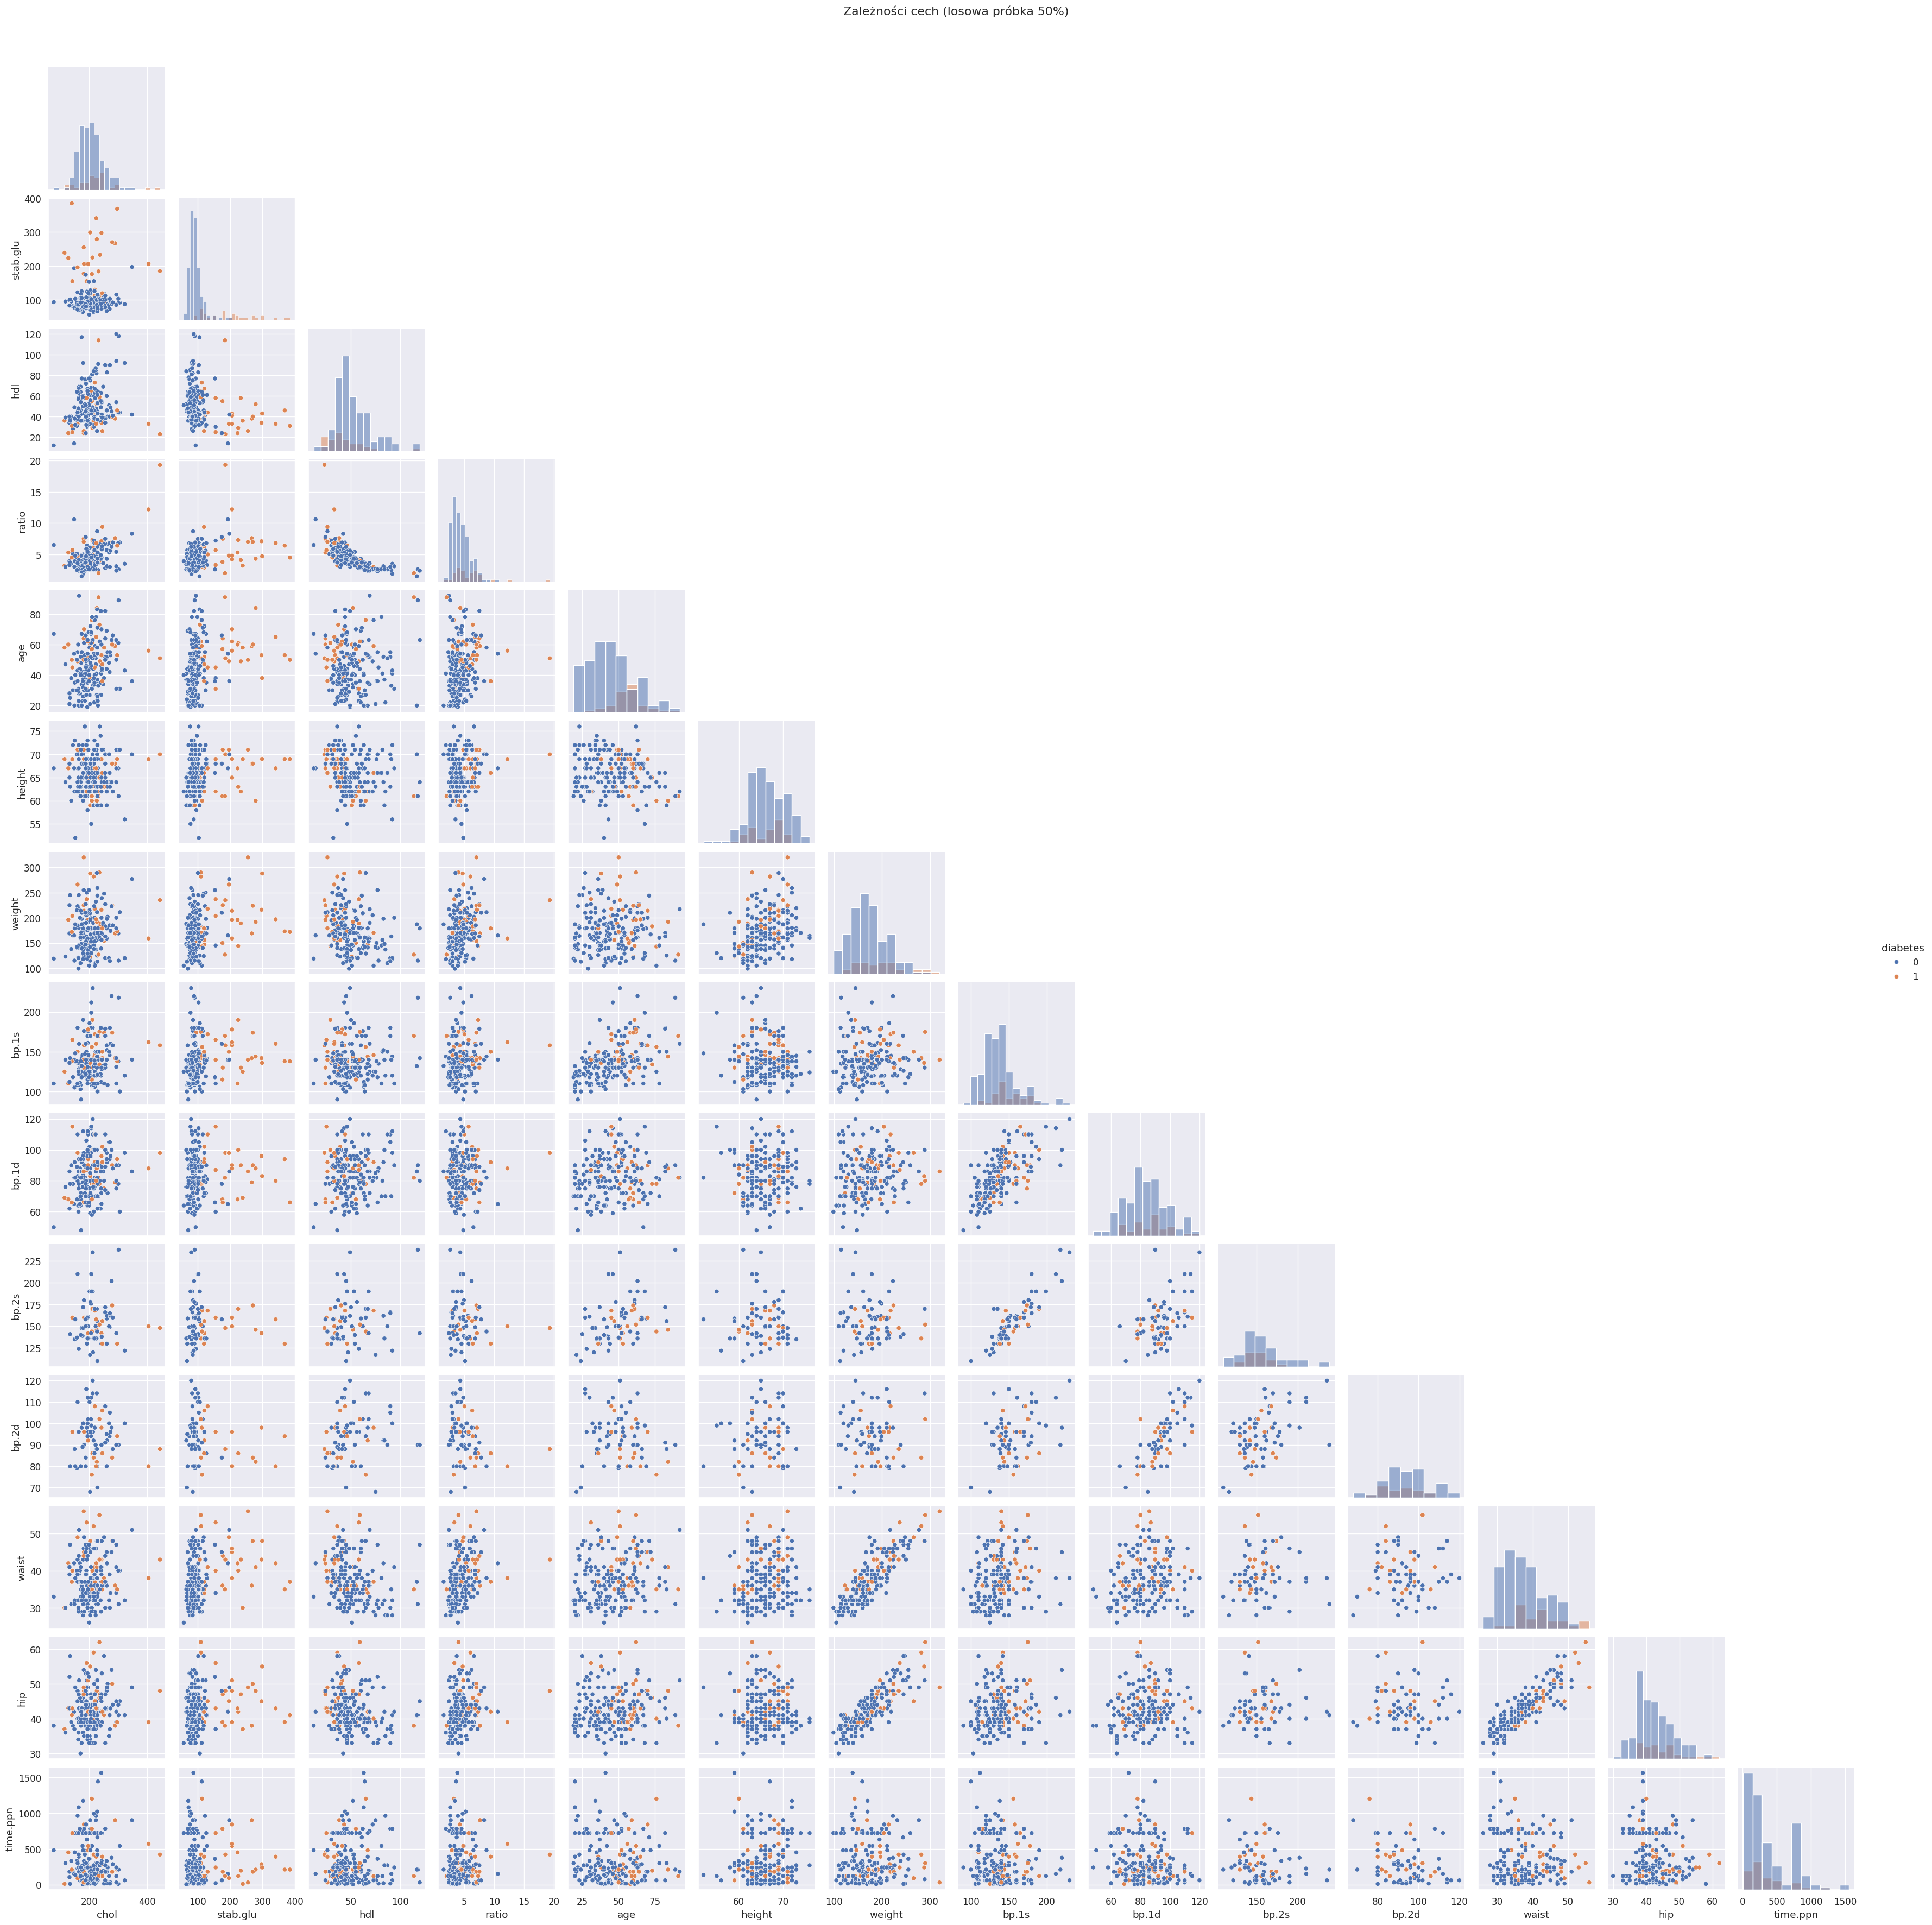

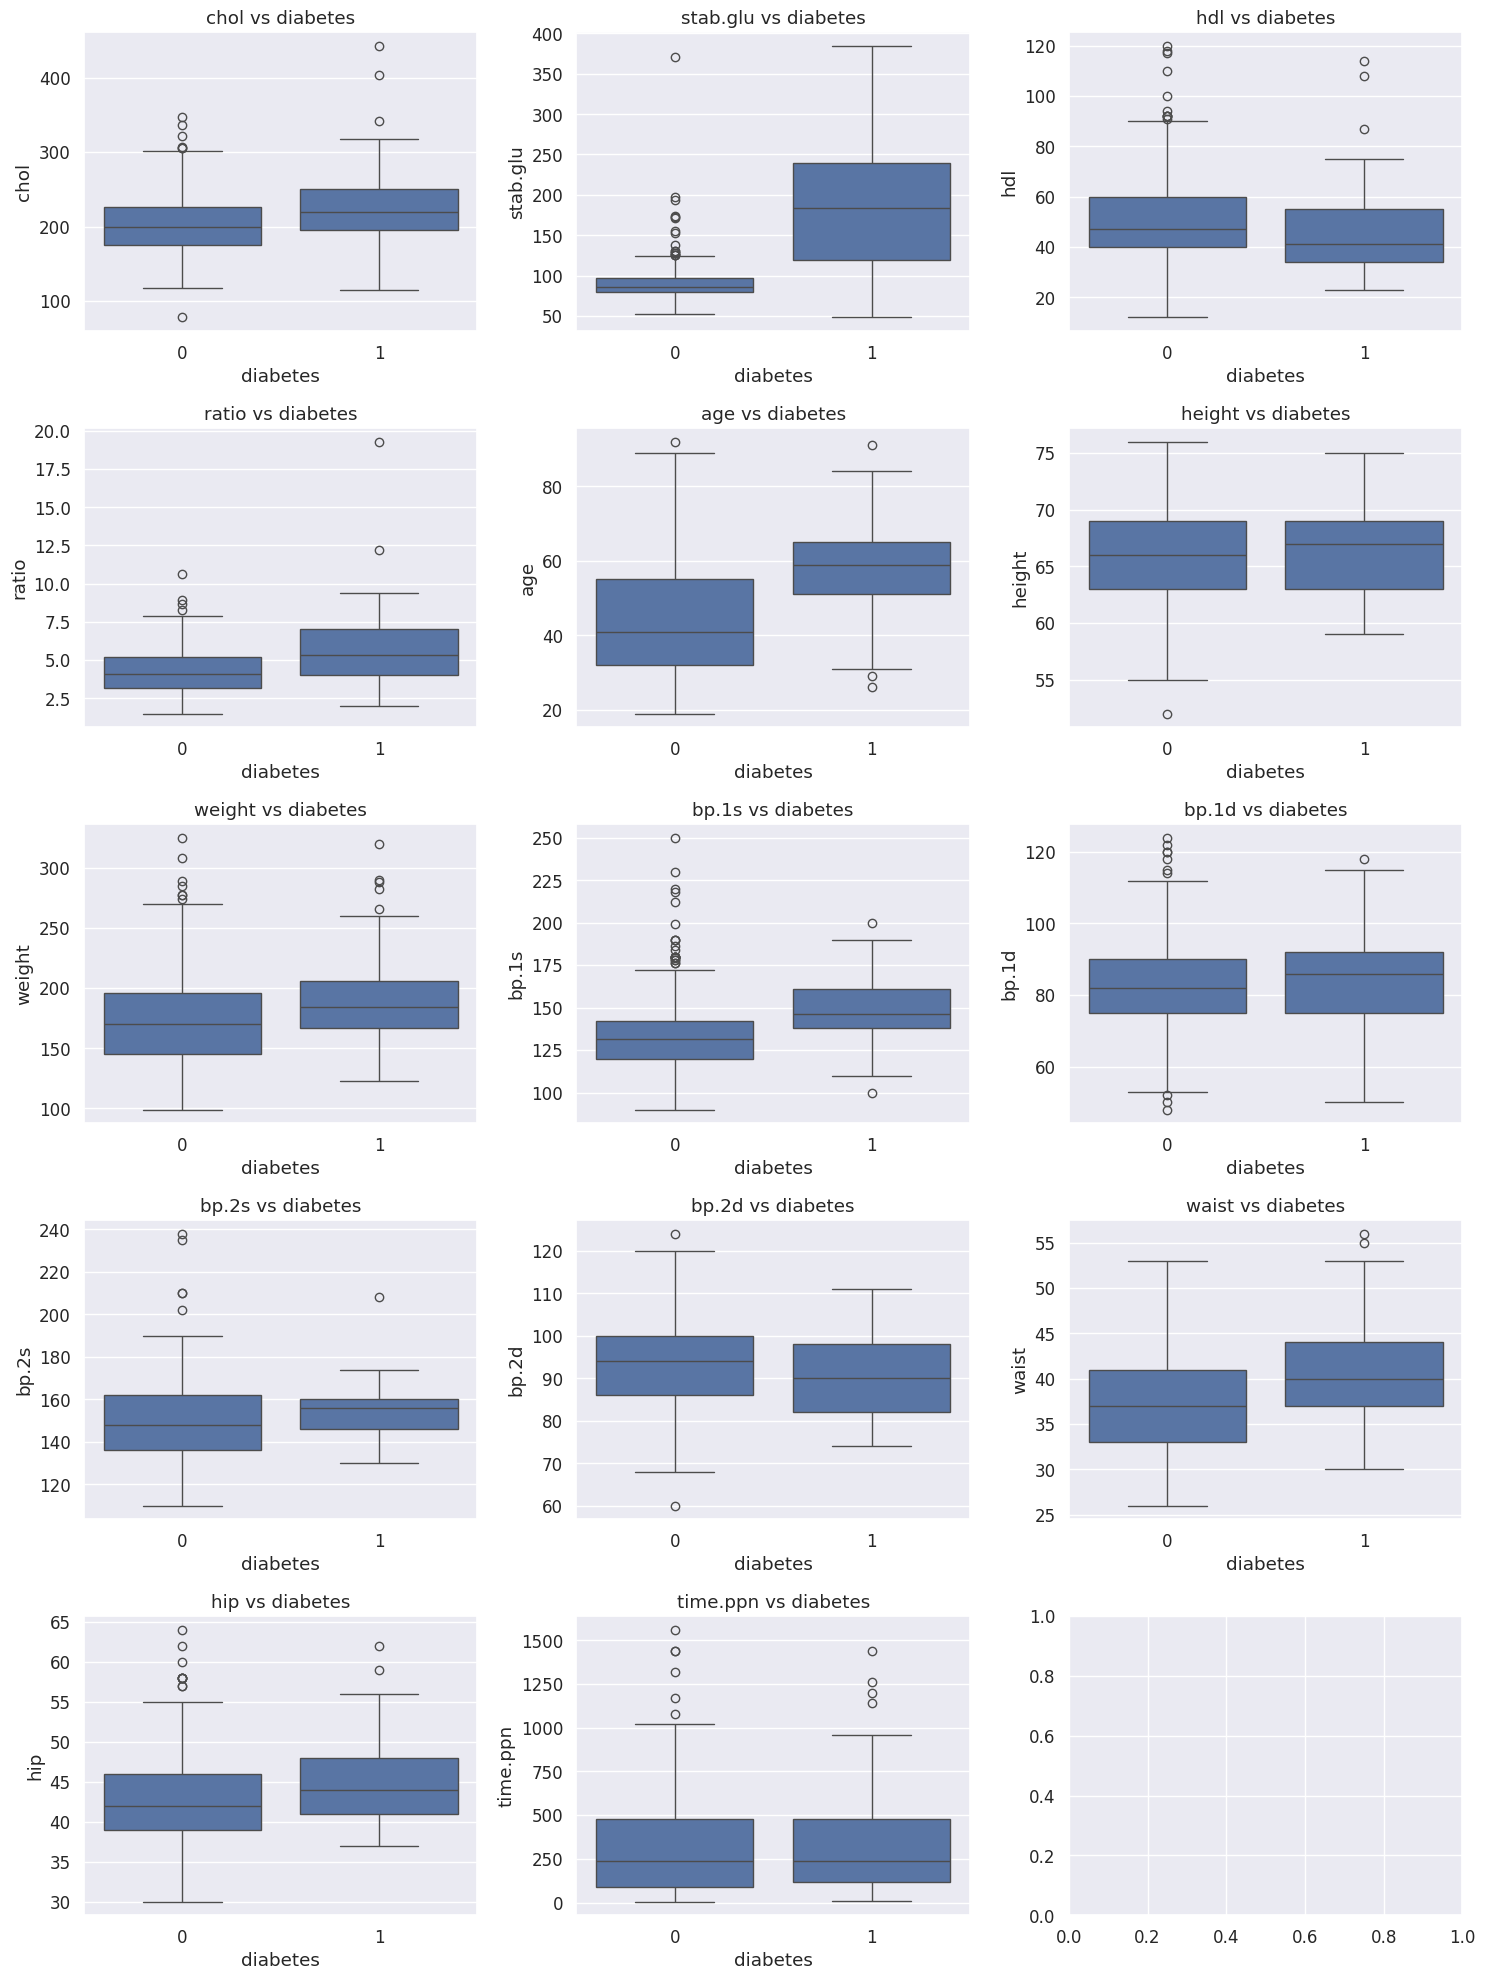

In [ ]:
plt.style.use("default")  # ustawienie stylu wykresów
sns.set(font_scale=1.1)  # skala czcionki
pd.set_option("display.max_columns", None)  # wyświetlanie wszystkich kolumn

path = kagglehub.dataset_download("imtkaggleteam/diabetes")  # pobranie danych
path = pathlib.Path(path)  # konwersja ścieżki
csv_file = next(path.glob("*.csv"))  # wyszukiwanie pliku CSV
df = pd.read_csv(csv_file.as_posix())  # odczyt pliku CSV

df = df.dropna(subset=["glyhb"])  # usunięcie braków w glyhb
df["diabetes"] = (df["glyhb"] >= 6.5).astype(int)  # utworzenie zmiennej celu

target = "diabetes"  # nazwa zmiennej celu
feature_cols = df.columns.drop(["id", "glyhb", target])  # wybór cech

print(f"Załadowano {df.shape[0]} wierszy i {df.shape[1]} kolumn.\n")  # podsumowanie danych
display(df.head())  # podgląd pierwszych wierszy
df.info()  # informacja o DataFrame
print("\nStatystyki opisowe:")  # nagłówek statystyk
display(df.describe().T)  # statystyki opisowe cech

class_counts = df[target].value_counts().rename(index={0:"Brak cukrzycy",1:"Cukrzyca"})  # zliczanie klas
print("\nRozkład klas:")  # nagłówek rozkładu klas
display(class_counts)  # wyświetlenie rozkładu klas

fig, ax = plt.subplots()  # inicjalizacja wykresu
ax.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", startangle=90)  # wykres kołowy
ax.set_title(f"Bilans klas – {target}")  # tytuł wykresu
plt.show()  # wyświetlenie wykresu

missing_summary = df.isna().sum().to_frame("Liczba braków")  # podsumowanie braków
print("\nBraki danych w kolumnach:")  # nagłówek braków
display(missing_summary)  # wyświetlenie braków danych

num_cols = df[feature_cols].select_dtypes(include="number").columns  # lista cech numerycznych
n = len(num_cols)  # liczba cech numerycznych
cols = 3  # liczba kolumn wykresów
rows = (n + cols - 1) // cols  # obliczenie liczby wierszy
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))  # inicjalizacja siatki wykresów
axes = axes.flatten()  # spłaszczenie tablicy osi
for ax, col in zip(axes, num_cols):  # iteracja po cechach
    sns.histplot(df[col], kde=True, ax=ax)  # histogram z gęstością
    ax.set_title(col)  # tytuł pod wykresem
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie histogramów

corr = df[num_cols].corr()  # obliczenie macierzy korelacji
plt.figure(figsize=(10, 8))  # rozmiar wykresu
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)  # mapa cieplna korelacji
plt.title("Korelacje cech numerycznych")  # tytuł wykresu
plt.show()  # wyświetlenie mapy cieplnej

sns.pairplot(df.sample(frac=0.5, random_state=42), hue=target, vars=num_cols, diag_kind="hist", corner=True)  # analiza zależności cech
plt.suptitle("Zależności cech (losowa próbka 50%)", y=1.02)  # tytuł zbiorczy
plt.show()  # wyświetlenie pairplot

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))  # inicjalizacja siatki wykresów
axes = axes.flatten()  # spłaszczenie tablicy osi
for ax, col in zip(axes, num_cols):  # iteracja po cechach
    sns.boxplot(x=target, y=col, data=df, ax=ax)  # wykres pudełkowy
    ax.set_title(f"{col} vs {target}")  # tytuł pod wykresem
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresów pudełkowych


## Preprocessing

In [ ]:
target = "diabetes"  # zmienna celu
feature_cols = df.columns.drop(["id", "glyhb", target])  # cechy

X = df[feature_cols].copy()  # dane wejściowe
y = df[target].copy()  # etykiety

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # udział zbioru testowego
    stratify=y,  # zachowanie proporcji klas
    random_state=42  # ziarno losowości
)

class Winsorizer(BaseEstimator, TransformerMixin):  # klasa Winsorizer
    def __init__(self, lower_q=0.01, upper_q=0.99):  # inicjalizacja kwantyli
        self.lower_q = lower_q
        self.upper_q = upper_q
    def fit(self, X, y=None):  # obliczenie progów
        arr = X if isinstance(X, np.ndarray) else X.to_numpy()  # konwersja do tablicy
        q_low  = np.nanquantile(arr, self.lower_q, axis=0)  # dolny kwantyl
        q_high = np.nanquantile(arr, self.upper_q, axis=0)  # górny kwantyl
        self.bounds_ = np.vstack([q_low, q_high]).T  # progi
        return self
    def transform(self, X):  # przycinanie wartości
        arr = X if isinstance(X, np.ndarray) else X.to_numpy()  # konwersja do tablicy
        for i in range(arr.shape[1]):  # iteracja po cechach
            lo, hi = self.bounds_[i]  # granice
            arr[:, i] = np.clip(arr[:, i], lo, hi)  # przycięcie
        return arr

numeric_cols  = df[feature_cols].select_dtypes(include="number").columns.tolist()  # cechy numeryczne
categorical_cols  = df[feature_cols].select_dtypes(exclude="number").columns.tolist()  # cechy kategoryczne

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median", add_indicator=True)),  # imputacja medianą
    ("winsor",  Winsorizer(0.01, 0.99)),  # winsoryzacja
    ("binning", KBinsDiscretizer(n_bins=5, encode="onehot-dense",
                                 strategy="quantile")),  # dyskretyzacja
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # imputacja najczęstszą
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),  # kodowanie one-hot
])

preprocess_ct = ColumnTransformer([
    ("num", num_pipe, numeric_cols),  # przetwarzanie numerycznych
    ("cat", cat_pipe, categorical_cols),  # przetwarzanie kategorycznych
], remainder="drop")

prep_pipeline = ImbPipeline([
    ("preprocess",  preprocess_ct),  # etap preprocessingu
    ("undersample", RandomUnderSampler(random_state=42)),  # undersampling
])

X_train_proc, y_train_bal = prep_pipeline.fit_resample(X_train, y_train)  # trenowanie i balans

X_test_proc  = prep_pipeline.named_steps["preprocess"].transform(X_test)  # przetworzenie testu

print(f"Po preprocessingu: X_train={X_train_proc.shape}, X_test={X_test_proc.shape}")  # rozmiary
print("Rozkład klas po undersamplingu w train:", np.bincount(y_train_bal))  # rozkład klas


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 14 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 15 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:262: UserWarning: Feature 16 is constant and will be replaced with 0.
  warnings.warn(
/usr/local/lib/python3.11/dist-packag

Po preprocessingu: X_train=(104, 83), X_test=(78, 83)
Rozkład klas po undersamplingu w train: [52 52]


## EDA po preprocessingu

Przetworzone kolumny: 83


,chol_bin0,chol_bin1,chol_bin2,chol_bin3,chol_bin4,stab.glu_bin0,stab.glu_bin1,stab.glu_bin2,stab.glu_bin3,stab.glu_bin4,hdl_bin0,hdl_bin1,hdl_bin2,hdl_bin3,hdl_bin4,ratio_bin0,ratio_bin1,ratio_bin2,ratio_bin3,ratio_bin4,age_bin0,age_bin1,age_bin2,age_bin3,age_bin4,height_bin0,height_bin1,height_bin2,height_bin3,height_bin4,weight_bin0,weight_bin1,weight_bin2,weight_bin3,weight_bin4,bp.1s_bin0,bp.1s_bin1,bp.1s_bin2,bp.1s_bin3,bp.1s_bin4,bp.1d_bin0,bp.1d_bin1,bp.1d_bin2,bp.1d_bin3,bp.1d_bin4,bp.2s_bin0,bp.2s_bin1,bp.2d_bin0,bp.2d_bin1,waist_bin0,waist_bin1,waist_bin2,waist_bin3,waist_bin4,hip_bin0,hip_bin1,hip_bin2,hip_bin3,hip_bin4,time.ppn_bin0,time.ppn_bin1,time.ppn_bin2,time.ppn_bin3,time.ppn_bin4,chol_missing,hdl_missing,ratio_missing,height_missing,weight_missing,bp.1s_missing,bp.1d_missing,bp.2s_missing,bp.2d_missing,waist_missing,hip_missing,time.ppn_missing,location_Buckingham,location_Louisa,gender_female,gender_male,frame_large,frame_medium,frame_small
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


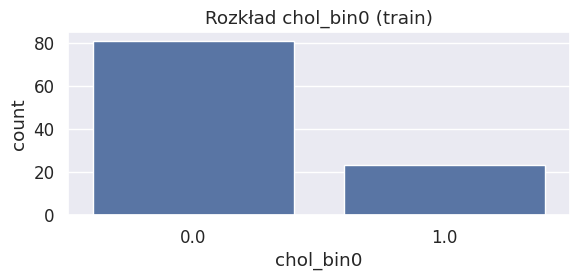

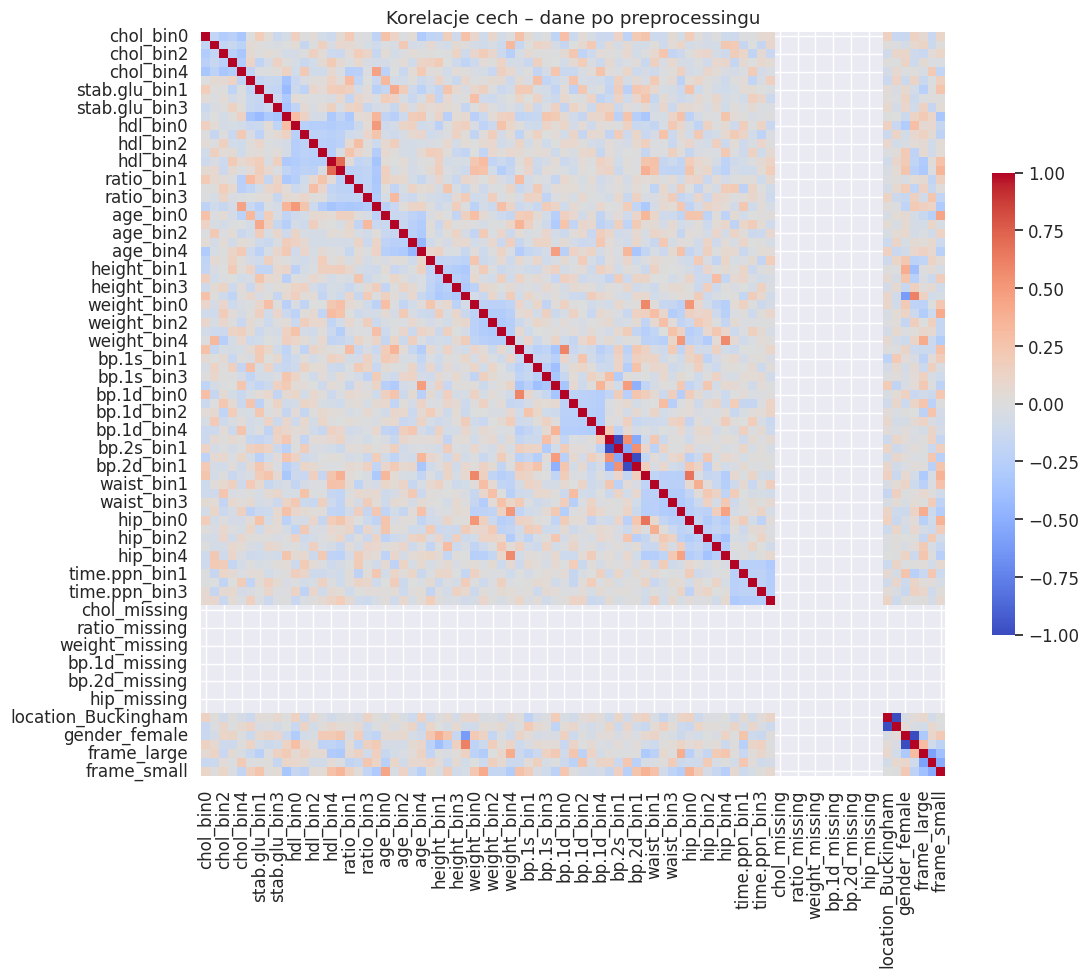

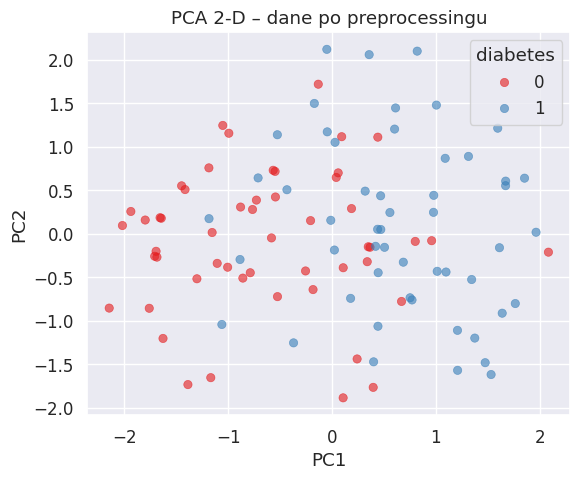

Bilans klas w zbiorze train po preprocessingu:


,count
diabetes,
Brak cukrzycy,52
Cukrzyca,52


In [ ]:
ct = prep_pipeline.named_steps["preprocess"]  # dostęp do preprocessingu

binning = ct.named_transformers_["num"].named_steps["binning"]  # ekstrakcja biningu
n_bins  = [len(edges) - 1 for edges in binning.bin_edges_]  # liczba przedziałów
feat_binned  = [f"{col}_bin{idx}"
                for col, nb in zip(numeric_cols, n_bins)
                for idx in range(nb)]  # nazwy cech po biningu

missing_idx  = ct.named_transformers_["num"].named_steps["imputer"].indicator_.features_  # indeksy braków
feat_missing = [f"{numeric_cols[i]}_missing" for i in missing_idx]  # nazwy wskaźników braków

encoder = ct.named_transformers_["cat"].named_steps["encoder"]  # ekstrakcja enkodera
cat_feature_names = []
for col, cats in zip(categorical_cols, encoder.categories_):  # iteracja po kategoriach
    cat_feature_names.extend([f"{col}_{cat}" for cat in cats])  # nazwy cech kategorycznych

proc_cols = feat_binned + feat_missing + cat_feature_names  # lista wszystkich przetworzonych kolumn

X_train_df = pd.DataFrame(X_train_proc, columns=proc_cols)  # utworzenie DataFrame train
X_test_df  = pd.DataFrame(X_test_proc,  columns=proc_cols)  # utworzenie DataFrame test

print("Przetworzone kolumny:", len(proc_cols))  # liczba kolumn po preprocessingu
display(X_train_df.head())  # podgląd pierwszych wierszy

sample_feat = feat_binned[0]  # wybór przykładowej cechy
plt.figure(figsize=(6, 3))  # rozmiar wykresu
sns.countplot(x=sample_feat, data=X_train_df)  # wykres liczebności
plt.title(f"Rozkład {sample_feat} (train)")  # tytuł wykresu
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresu

corr_proc = X_train_df.corr(method="pearson")  # obliczenie korelacji
plt.figure(figsize=(12, 10))  # rozmiar mapy cieplnej
sns.heatmap(corr_proc, cmap="coolwarm", center=0, square=True,
            cbar_kws={"shrink": .6}, vmax=1, vmin=-1)  # mapa cieplna korelacji
plt.title("Korelacje cech – dane po preprocessingu")  # tytuł mapy
plt.show()  # wyświetlenie mapy

pca = PCA(n_components=2, random_state=42)  # inicjalizacja PCA
proj = pca.fit_transform(X_train_df)  # projekcja na dwie składowe
plt.figure(figsize=(6, 5))  # rozmiar wykresu PCA
sns.scatterplot(x=proj[:, 0], y=proj[:, 1],
                hue=y_train_bal.reset_index(drop=True),
                palette="Set1", alpha=.6, edgecolor=None)  # wykres punktowy PCA
plt.title("PCA 2-D – dane po preprocessingu")  # tytuł wykresu
plt.xlabel("PC1"); plt.ylabel("PC2")  # etykiety osi
plt.legend(title="diabetes")  # legenda
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresu

print("Bilans klas w zbiorze train po preprocessingu:")  # nagłówek bilansu klas
display(pd.Series(y_train_bal).value_counts().rename(index={0: "Brak cukrzycy", 1: "Cukrzyca"}))  # wyświetlenie rozkładu


## Trening+ hiperparametry

In [ ]:
X_train_rf_proc = X_train_proc  # przygotowanie danych do RF
X_test_rf_proc  = X_test_proc  # przygotowanie danych testowych
y_train         = y_train_bal  # etykiety po balansowaniu

models_dir = Path(os.getcwd()) / "models"  # katalog modeli
models_dir.mkdir(parents=True, exist_ok=True)  # tworzenie katalogu

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # walidacja krzyżowa

# 1) Model prosty – strojenie tylko liczby drzew
rf_simple = RandomForestClassifier(random_state=42, n_jobs=-1)  # inicjalizacja RF
param_simple = {
    "n_estimators": [50, 100, 200]  # liczba drzew
}
search_simple = RandomizedSearchCV(
    rf_simple,
    param_simple,
    n_iter=3,  # próby
    scoring="roc_auc",  # metryka
    cv=cv,  # walidacja
    random_state=42,
    n_jobs=-1
)
search_simple.fit(X_train_rf_proc, y_train)  # dopasowanie modelu
joblib.dump(search_simple.best_estimator_, models_dir / "rf_simple.joblib")  # zapis modelu

# 2) Model umiarkowany – dodatkowe ograniczenie głębokości
rf_mid = RandomForestClassifier(random_state=42, n_jobs=-1)  # inicjalizacja RF
param_mid = {
    "n_estimators":    [100, 200, 300],  # liczba drzew
    "max_depth":       [None, 10, 20, 30]  # maksymalna głębokość
}
search_mid = RandomizedSearchCV(
    rf_mid,
    param_mid,
    n_iter=8,  # próby
    scoring="roc_auc",  # metryka
    cv=cv,  # walidacja
    random_state=42,
    n_jobs=-1
)
search_mid.fit(X_train_rf_proc, y_train)  # dopasowanie modelu
joblib.dump(search_mid.best_estimator_, models_dir / "rf_mid.joblib")  # zapis modelu

# 3) Model zaawansowany – strojenie wielu parametrów
rf_adv = RandomForestClassifier(random_state=42, n_jobs=-1)  # inicjalizacja RF
param_adv = {
    "n_estimators":    [100, 200, 300, 500],  # liczba drzew
    "max_depth":       [None, 5, 10, 20, 30],  # maksymalna głębokość
    "max_features":    ["sqrt", "log2", None],  # liczba cech
    "min_samples_split":[2, 5, 10],  # minimalne próbki do podziału
    "min_samples_leaf": [1, 2, 4],  # minimalne próbki w liściu
    "bootstrap":       [True, False]  # bootstrap
}
search_adv = RandomizedSearchCV(
    rf_adv,
    param_adv,
    n_iter=20,  # próby
    scoring="roc_auc",  # metryka
    cv=cv,  # walidacja
    random_state=42,
    n_jobs=-1
)
search_adv.fit(X_train_rf_proc, y_train)  # dopasowanie modelu
joblib.dump(search_adv.best_estimator_, models_dir / "rf_advanced.joblib")  # zapis modelu


['/content/models/rf_advanced.joblib']

## Ewaluacja

,CV_ROC_AUC,CV_Accuracy,CV_BalAcc,CV_Precision,CV_Recall,CV_F1,Test_Accuracy,Test_BalAcc,Test_Precision,Test_Recall,Test_F1,Test_ROC_AUC,Test_PR_AUC,Test_MCC
Model,,,,,,,,,,,,,,
Simple,0.843,0.759,0.759,0.736,0.827,0.777,0.808,0.854,0.462,0.923,0.615,0.908,0.710,0.559
Mid,0.848,0.759,0.759,0.736,0.827,0.777,0.808,0.854,0.462,0.923,0.615,0.910,0.737,0.559
Advanced,0.870,0.760,0.761,0.737,0.831,0.776,0.731,0.777,0.367,0.846,0.512,0.883,0.689,0.424


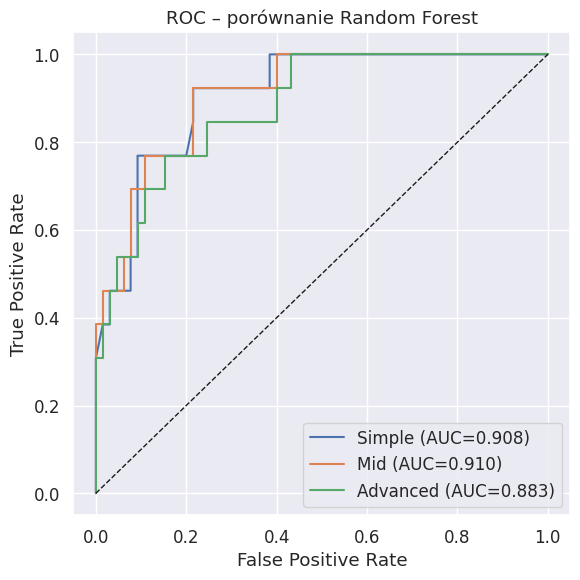

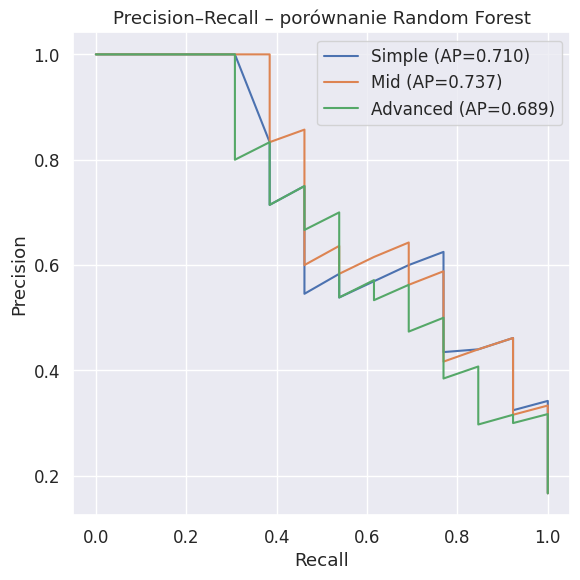

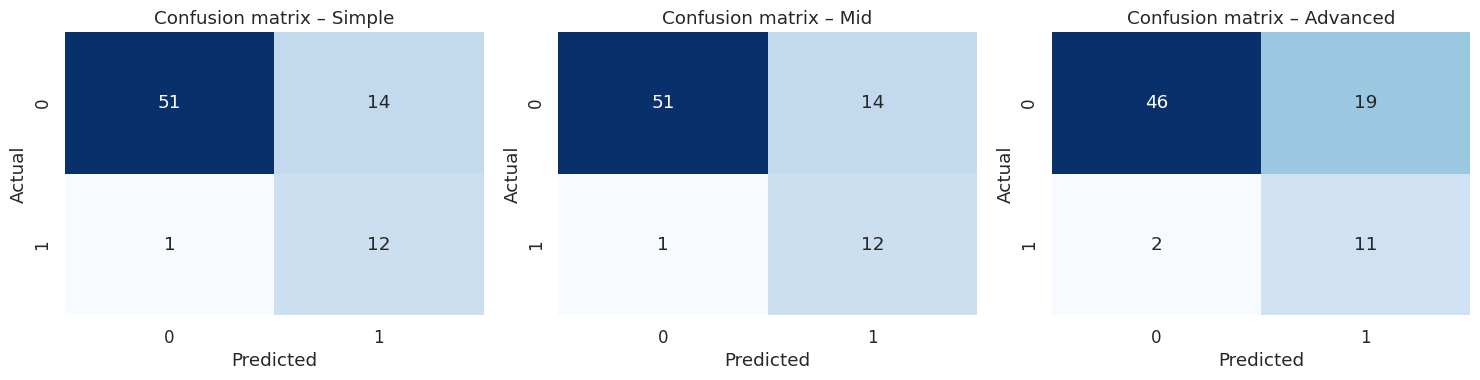

In [ ]:
models_dir = Path(os.getcwd()) / "models"  # katalog modeli
models = {
    "Simple":   joblib.load(models_dir / "rf_simple.joblib"),  # ładowanie modelu prostego
    "Mid":      joblib.load(models_dir / "rf_mid.joblib"),     # ładowanie modelu umiarkowanego
    "Advanced": joblib.load(models_dir / "rf_advanced.joblib"),# ładowanie modelu zaawansowanego
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # walidacja krzyżowa

records = []  # zbiór wyników
curves  = {}  # krzywe metryk

for tag, model in models.items():  # iteracja po modelach
    cv_res = cross_validate(  # walidacja krzyżowa metryk
        model,
        X_train_rf_proc,
        y_train,
        cv=cv,
        scoring={
            "ROC_AUC": "roc_auc",
            "Accuracy": "accuracy",
            "BalAcc": "balanced_accuracy",
            "Precision": "precision",
            "Recall": "recall",
            "F1": "f1",
        },
        n_jobs=-1,
        return_train_score=False
    )

    y_proba = model.predict_proba(X_test_rf_proc)[:, 1]  # prawdopodobieństwa dla klasy 1
    y_pred  = model.predict(X_test_rf_proc)  # predykcje klas

    rec = {  # obliczenie metryk testowych i CV
        "Model":        tag,
        "CV_ROC_AUC":   cv_res["test_ROC_AUC"].mean(),
        "CV_Accuracy":  cv_res["test_Accuracy"].mean(),
        "CV_BalAcc":    cv_res["test_BalAcc"].mean(),
        "CV_Precision": cv_res["test_Precision"].mean(),
        "CV_Recall":    cv_res["test_Recall"].mean(),
        "CV_F1":        cv_res["test_F1"].mean(),
        "Test_Accuracy":      accuracy_score(y_test, y_pred),  # dokładność testowa
        "Test_BalAcc":        balanced_accuracy_score(y_test, y_pred),  # zbalansowana dokładność testowa
        "Test_Precision":     precision_score(y_test, y_pred, zero_division=0),  # precyzja testowa
        "Test_Recall":        recall_score(y_test, y_pred, zero_division=0),  # czułość testowa
        "Test_F1":            f1_score(y_test, y_pred, zero_division=0),  # F1 testowe
        "Test_ROC_AUC":       roc_auc_score(y_test, y_proba),  # AUC ROC testowe
        "Test_PR_AUC":        average_precision_score(y_test, y_proba),  # AUC PR testowe
        "Test_MCC":           matthews_corrcoef(y_test, y_pred),  # współczynnik MCC testowy
    }
    records.append(rec)  # dodanie wyniku do listy

    fpr, tpr, _ = roc_curve(y_test, y_proba)  # krzywa ROC
    prec, rec_, _ = precision_recall_curve(y_test, y_proba)  # krzywa Precision–Recall
    curves[tag] = {"fpr": fpr, "tpr": tpr, "prec": prec, "rec": rec_}  # zapis krzywych

metrics_df = pd.DataFrame(records).set_index("Model").round(3)  # tabela metryk
display(metrics_df)  # wyświetlenie tabeli metryk

plt.figure(figsize=(6, 6))  # inicjalizacja figury ROC
for tag, pts in curves.items():  # iteracja po krzywych
    auc = metrics_df.loc[tag, "Test_ROC_AUC"]  # pobranie AUC ROC
    plt.plot(pts["fpr"], pts["tpr"], label=f"{tag} (AUC={auc:.3f})")  # wykres ROC
plt.plot([0, 1], [0, 1], "k--", lw=1)  # linia losowa
plt.xlabel("False Positive Rate")  # etykieta osi X
plt.ylabel("True Positive Rate")  # etykieta osi Y
plt.title("ROC – porównanie Random Forest")  # tytuł wykresu
plt.legend()  # legenda
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresu

plt.figure(figsize=(6, 6))  # inicjalizacja figury Precision–Recall
for tag, pts in curves.items():  # iteracja po krzywych
    ap = metrics_df.loc[tag, "Test_PR_AUC"]  # pobranie AUC PR
    plt.plot(pts["rec"], pts["prec"], label=f"{tag} (AP={ap:.3f})")  # wykres Precision–Recall
plt.xlabel("Recall")  # etykieta osi X
plt.ylabel("Precision")  # etykieta osi Y
plt.title("Precision–Recall – porównanie Random Forest")  # tytuł wykresu
plt.legend()  # legenda
plt.tight_layout()  # dopasowanie układu
plt.show()  # wyświetlenie wykresu

SHOW_CM = True  # flaga macierzy pomyłek
if SHOW_CM:
    fig, axes = plt.subplots(1, len(models), figsize=(5*len(models), 4))  # inicjalizacja subplots
    for ax, (tag, model) in zip(axes, models.items()):  # iteracja po modelach
        cm = confusion_matrix(y_test, model.predict(X_test_rf_proc))  # obliczenie macierzy pomyłek
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)  # wykres macierzy
        ax.set_title(f"Confusion matrix – {tag}")  # tytuł wykresu
        ax.set_xlabel("Predicted")  # etykieta osi X
        ax.set_ylabel("Actual")  # etykieta osi Y
    plt.tight_layout()  # dopasowanie układu
    plt.show()  # wyświetlenie wykresów
